Deep Learning Text-category

Keterangan :
- Film (1)
- Olahraga (2)
- Makanan (3)
- Hewan (4)
- Otomotif (5)

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [22]:
words = [
    "avengers adalah film produksi marvel",
    "batman adalah film produksi dc",
    "spiderman adalah film superhero marvel",
    "superman adalah film superhero dc",
    "pixar memproduksi film animasi lucu",
    "barcelona memiliki pemain yang hebat",
    "barcelona adalah club dari spanyol",
    "juventus adalah club besar italia",
    "ronaldo adalah pemain terbaik 2009",
    "ronaldo adalah pemain kunci juventus",
    "nasi padang berasal dari padang",
    "nasi goreng ini enak sekali",
    "pizza adalah makanan dari italia",
    "gudeg adalah makanan khas jogja",
    "magelangan makanan mirip nasi goreng",
    "kucing adalah hewan peliharaan lucu",
    "kucing senang bermain dengan tali",
    "jerapah adalah hewan liar herbivora",
    "jerapah memiliki leher yang panjang",
    "macan adalah hewan mirip kucing",
    "nissan sylvia adalah mobil jdm",
    "vario adalah motor dari honda",
    "nmax adalah motor dari yamaha",
    "mobil ignis adalah mobil jdm",
    "lamborgini mobil cepat dan mahal"
]

label = [[1,0,0,0,0], [1,0,0,0,0], [1,0,0,0,0], [1,0,0,0,0], [1,0,0,0,0], [0,1,0,0,0], [0,1,0,0,0], [0,1,0,0,0], [0,1,0,0,0], [0,1,0,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,1,0], [0,0,0,1,0], [0,0,0,1,0], [0,0,0,1,0], [0,0,0,0,1], [0,0,0,0,1], [0,0,0,0,1], [0,0,0,0,1], [0,0,0,0,1]]

# Label
FILM (1,0,0,0,0)

OLAHRAGA (0,1,0,0,0)

MANAKAN (0,0,1,0,0)

HEWAN (0,0,0,1,0)

OTOMOTIF (0,0,0,0,1)

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
words_splited = [word.split(" ") for word in words]
words_splited

[['avengers', 'adalah', 'film', 'produksi', 'marvel'],
 ['batman', 'adalah', 'film', 'produksi', 'dc'],
 ['spiderman', 'adalah', 'film', 'superhero', 'marvel'],
 ['superman', 'adalah', 'film', 'superhero', 'dc'],
 ['pixar', 'memproduksi', 'film', 'animasi', 'lucu'],
 ['barcelona', 'memiliki', 'pemain', 'yang', 'hebat'],
 ['barcelona', 'adalah', 'club', 'dari', 'spanyol'],
 ['juventus', 'adalah', 'club', 'besar', 'italia'],
 ['ronaldo', 'adalah', 'pemain', 'terbaik', '2009'],
 ['ronaldo', 'adalah', 'pemain', 'kunci', 'juventus'],
 ['nasi', 'padang', 'berasal', 'dari', 'padang'],
 ['nasi', 'goreng', 'ini', 'enak', 'sekali'],
 ['pizza', 'adalah', 'makanan', 'dari', 'italia'],
 ['gudeg', 'adalah', 'makanan', 'khas', 'jogja'],
 ['magelangan', 'makanan', 'mirip', 'nasi', 'goreng'],
 ['kucing', 'adalah', 'hewan', 'peliharaan', 'lucu'],
 ['kucing', 'senang', 'bermain', 'dengan', 'tali'],
 ['jerapah', 'adalah', 'hewan', 'liar', 'herbivora'],
 ['jerapah', 'memiliki', 'leher', 'yang', 'panjang'],

In [25]:
tzer = Tokenizer()
tzer.fit_on_texts(words_splited)

In [26]:
words_tokenized=tzer.texts_to_sequences(words_splited)
words_tokenized

[[28, 1, 2, 10, 11],
 [29, 1, 2, 10, 12],
 [30, 1, 2, 13, 11],
 [31, 1, 2, 13, 12],
 [32, 33, 2, 34, 14],
 [15, 16, 5, 17, 35],
 [15, 1, 18, 3, 36],
 [19, 1, 18, 37, 20],
 [21, 1, 5, 38, 39],
 [21, 1, 5, 40, 19],
 [6, 22, 41, 3, 22],
 [6, 23, 42, 43, 44],
 [45, 1, 7, 3, 20],
 [46, 1, 7, 47, 48],
 [49, 7, 24, 6, 23],
 [8, 1, 9, 50, 14],
 [8, 51, 52, 53, 54],
 [25, 1, 9, 55, 56],
 [25, 16, 57, 17, 58],
 [59, 1, 9, 24, 8],
 [60, 61, 1, 4, 26],
 [62, 1, 27, 3, 63],
 [64, 1, 27, 3, 65],
 [4, 66, 1, 4, 26],
 [67, 4, 68, 69, 70]]

In [27]:
tzer.sequences_to_texts([[25, 16, 57, 17, 58]])

['jerapah memiliki leher yang panjang']

In [28]:
X = []
y = np.array(label)
for wt in words_tokenized:
    ph = np.zeros(5)
    ph[:len(wt)] = wt
    X.append(ph)
X = np.array(X)

print(X, y)



[[28.  1.  2. 10. 11.]
 [29.  1.  2. 10. 12.]
 [30.  1.  2. 13. 11.]
 [31.  1.  2. 13. 12.]
 [32. 33.  2. 34. 14.]
 [15. 16.  5. 17. 35.]
 [15.  1. 18.  3. 36.]
 [19.  1. 18. 37. 20.]
 [21.  1.  5. 38. 39.]
 [21.  1.  5. 40. 19.]
 [ 6. 22. 41.  3. 22.]
 [ 6. 23. 42. 43. 44.]
 [45.  1.  7.  3. 20.]
 [46.  1.  7. 47. 48.]
 [49.  7. 24.  6. 23.]
 [ 8.  1.  9. 50. 14.]
 [ 8. 51. 52. 53. 54.]
 [25.  1.  9. 55. 56.]
 [25. 16. 57. 17. 58.]
 [59.  1.  9. 24.  8.]
 [60. 61.  1.  4. 26.]
 [62.  1. 27.  3. 63.]
 [64.  1. 27.  3. 65.]
 [ 4. 66.  1.  4. 26.]
 [67.  4. 68. 69. 70.]] [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [29]:
X.shape, y.shape

((25, 5), (25, 5))

## Buat Model

In [30]:
# model = Sequential()
# model.add(Dense(10, activation="relu", input_shape=(5,)))
# model.add(Dense(5, activation="relu"))
# model.add(Dense(1, activation="sigmoid"))

model = Sequential()
model.add(Dense(25, input_dim=5, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(17, activation="relu"))
# model.add(Dense(9, activation="softmax"))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_4 (Dense)              (None, 17)                442       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 90        
Total params: 682
Trainable params: 682
Non-trainable params: 0
_________________________________________________________________


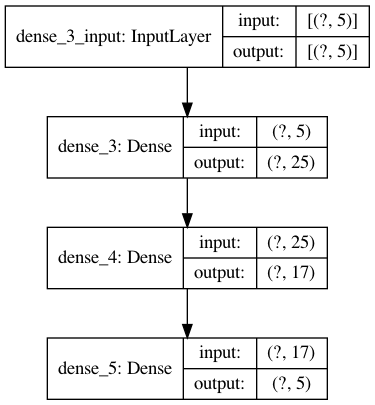

In [32]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [33]:

model.fit(X, y, verbose=0, batch_size=5, epochs=200)

model.evaluate(X, y)


1/1 [==============================] - 0s 2ms/step - loss: 0.0684


0.06838006526231766

In [34]:
lb = preprocessing.LabelBinarizer()
hasil = lb.fit(['film', 'olahraga', 'makanan', 'hewan', 'otomotif'])

In [35]:
yhat = model.predict(tzer.texts_to_sequences(["macan adalah hewan mirip kucing".split(" ")]))
yhat
np.round(yhat)[0]
yhat = lb.inverse_transform(yhat, threshold=None)
yhat

array(['olahraga'], dtype='<U8')

In [36]:
yhat = model.predict(tzer.texts_to_sequences(["mobil ignis adalah mobil jdm".split(" ")]))
yhat
np.round(yhat)[0]
yhat = lb.inverse_transform(yhat, threshold=None)
yhat

array(['otomotif'], dtype='<U8')

# Label
FILM (1,0,0,0,0)

OLAHRAGA (0,1,0,0,0)

MANAKAN (0,0,1,0,0)

HEWAN (0,0,0,1,0)

OTOMOTIF (0,0,0,0,1)